In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow import keras

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

In [7]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=[0.2,0.5],
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\My Work\Baranidharan Sir Research\cnn_xrays_images',
    target_size=(512, 512),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\My Work\Baranidharan Sir Research\cnn_xrays_images', # same directory as training data
    target_size=(512, 512),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(512, 512, 3))

Found 5121 images belonging to 3 classes.
Found 1278 images belonging to 3 classes.


In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(512,512,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 96)      34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 96)      384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 384)       8

In [10]:
graph = model.fit(train_generator, epochs=25, validation_data=validation_generator)
graph

Epoch 1/25
161/161 [==============================] - 1523s 9s/step - loss: 1.7118 - accuracy: 0.5103 - val_loss: 2.5307 - val_accuracy: 0.3858
Epoch 2/25
161/161 [==============================] - 1524s 9s/step - loss: 1.3126 - accuracy: 0.5745 - val_loss: 2.3814 - val_accuracy: 0.3998
Epoch 3/25
161/161 [==============================] - 1534s 10s/step - loss: 1.1532 - accuracy: 0.6048 - val_loss: 1.7123 - val_accuracy: 0.4554
Epoch 4/25
161/161 [==============================] - 1536s 10s/step - loss: 1.0921 - accuracy: 0.6057 - val_loss: 1.3978 - val_accuracy: 0.4789
Epoch 5/25
161/161 [==============================] - 1535s 10s/step - loss: 1.0093 - accuracy: 0.6237 - val_loss: 0.7716 - val_accuracy: 0.6721
Epoch 6/25
161/161 [==============================] - 1531s 10s/step - loss: 0.9462 - accuracy: 0.6436 - val_loss: 1.0657 - val_accuracy: 0.5055
Epoch 7/25
161/161 [==============================] - 1532s 10s/step - loss: 0.9078 - accuracy: 0.6411 - val_loss: 0.8163 - val_accu

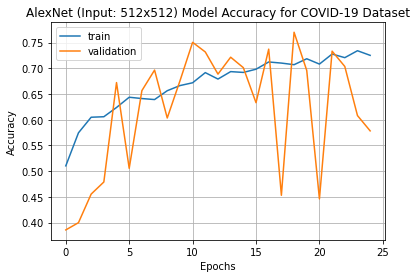

In [11]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('AlexNet (Input: 512x512) Model Accuracy for COVID-19 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

In [12]:
max_acc = max(graph.history['val_accuracy'])

print('The highest accuracy achieved using Alexnet Model with input 512x512 is',max_acc*100)

The highest accuracy achieved using Alexnet Model with input 512x512 is 76.99530720710754
